<a href="https://colab.research.google.com/github/089487/089487.github.io/blob/master/DRL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Reinforcement Learning Class Spring 2025 Assignment 1**

In this assignment, we will learn about gym interface, gridworld, q-learning, and etc. You will need to fill in the missing code snippets (marked by TODO).

Make a copy of this notebook using File > Save a copy in Drive and edit it with your answers.

WARNING: Do not put your name or any other personal identification information in this notebook.

# **Question 1:** Implement and Familiarize Yourself with a Grid World Environment
We will first become familiar with the grid world environment.

In this question, you need to implement a simple 3×3 grid world from scratch. Specifically, you should define functions such as reset(), step(), and render().

Additionally, you should explore and gain familiarity with MiniGrid in OpenAI Gym.

To define your GridWorldEnv.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

class GridWorldEnv:
    def __init__(self, size=5):
        """
        ✅ Grid World Environment
        - `size`: Grid size (default 5x5)
        - `agent_pos`: Initial position (0,0)
        - `goal_pos`: Goal position (size-1, size-1)
        - `reward`: +1 for reaching the goal, -0.1 per step
        """
        self.size = size
        self.agent_pos = [0, 0]  # Start position
        self.goal_pos = [size - 1, size - 1]  # Goal position
        self.done = False

    def reset(self):
        """
        ✅ Reset the environment
        - Reset `agent_pos` to (0,0)
        - Set `done` to False
        - Return the initial state
        """
        # TODO: Reset the agent's position to (0,0)
        self.agent_pos = [0, 0]

        # TODO: Set `done` to False
        self.done=False

        # TODO: Return the initial state as a NumPy array
        return np.array(self.agent_pos)

    def step(self, action):
        """
        ✅ Step function (move the agent)
        - `action=0`: Left (←)
        - `action=1`: Right (→)
        - `action=2`: Up (↑)
        - `action=3`: Down (↓)
        - After moving, calculate the reward (+1 for goal, -0.1 per step)
        - If the goal is reached, set `done=True`
        """
        # TODO: Implement movement logic based on the given action
        if action==0:
            if self.agent_pos[0]>0:
                self.agent_pos[0]-=1
        elif action==1:
            if self.agent_pos[0]+1<self.size:
                self.agent_pos[0]+=1
        elif action==2:
            if self.agent_pos[1]>0:
                self.agent_pos[1]-=1
        else:
            if self.agent_pos[1]+1<self.size:
                self.agent_pos[1]+=1
        for i in range(2):
            if self.agent_pos[i]<0: self.agent_pos[i]+=self.size
            elif self.agent_pos[i]>=self.size: self.agent_pos[i]-=self.size

        # TODO: Implement reward logic
        # If the agent reaches the goal, give +1 reward and set `done=True`
        if self.agent_pos[0]==self.goal_pos[0] and self.agent_pos[1]==self.goal_pos[1]:
            self.done=True
            reward=1
        else:
            reward=-0.1
        # TODO: Return the new state (NumPy array), reward, and `done` status
        return np.array(self.agent_pos),reward,self.done

    def render(self):
        """
        ✅ Render the environment
        - Draw the grid, marking the agent and the goal
        """
        # TODO: Create a grid of zeros with shape (size, size)
        grid = [[0 for i in range(self.size)] for j in range(self.size)]

        # TODO: Mark the goal position with 2
        grid[self.goal_pos[0]][self.goal_pos[1]]=2

        # TODO: Mark the agent position with 1
        grid[self.agent_pos[0]][self.agent_pos[1]]=1

        # TODO: Display the grid using matplotlib
        plt.imshow(grid)


This cell of code is designed to verify whether your implementation of the MiniGrid environment is correct.

⚠️ **Do not modify this cell**—any changes will result in a score of **0** for your own GridWorldEnv code above.

🎯 How to Get 10 Points?  
 1️⃣ Run the code below successfully.  
 2️⃣ Observe the agent randomly moving in the 3x3 GridWorld.(3 pts for reset/ 3 pts for render)  
 3️⃣ The agent should reach the goal (🏆) eventually and stop.(4pts for step)  
 4️⃣ If everything works, congratulations! You earned 10 points! 🎉  

🚀 Random Action Agent Starts!
Action: 1, Reward: -0.1, Done: False
Action: 2, Reward: -0.1, Done: False
Action: 3, Reward: -0.1, Done: False
Action: 2, Reward: -0.1, Done: False
Action: 3, Reward: -0.1, Done: False
Action: 0, Reward: -0.1, Done: False
Action: 2, Reward: -0.1, Done: False
Action: 3, Reward: -0.1, Done: False
Action: 0, Reward: -0.1, Done: False
Action: 3, Reward: -0.1, Done: False
Action: 0, Reward: -0.1, Done: False
Action: 1, Reward: -0.1, Done: False
Action: 0, Reward: -0.1, Done: False
Action: 1, Reward: -0.1, Done: False
Action: 1, Reward: 1, Done: True


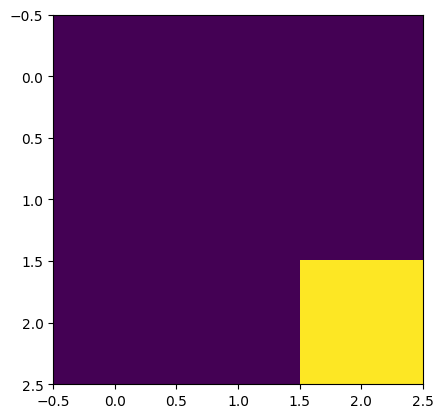

In [2]:
import random

env = GridWorldEnv(size=3)
obs = env.reset()
done = False

print("🚀 Random Action Agent Starts!")
while not done:
    action = random.choice([0, 1, 2, 3])
    obs, reward, done = env.step(action)
    env.render()
    print(f"Action: {action}, Reward: {reward}, Done: {done}")
    time.sleep(0.5)  # Wait for visualization


## **Setup**
Run the following skeleton code to set up the necessary imports and plotting functions.

In [3]:
!pip install gym-minigrid
import gym
import gym_minigrid
import os
import matplotlib.pyplot as plt
import imageio
import numpy as np
from IPython.display import Image


/usr/local/lib/python3.11/dist-packages/gym/envs/registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


## **Understanding the Gym MiniGrid Environment**
In this section, we will initialize a MiniGrid environment and explore its key properties.

***What is MiniGrid?***

MiniGrid is a lightweight grid world environment designed for reinforcement learning. The agent interacts with the environment by taking actions, receiving observations, and collecting rewards. It serves as an ideal testing ground for developing and evaluating reinforcement learning algorithms.

Simply execute this cell to retrieve key information about the environment.

In [4]:
# setup Environment
env = gym.make("MiniGrid-Empty-8x8-v0")

obs, info = env.reset()

# environment information
print("Action Space:", env.action_space)
print("Observation Keys:", obs.keys())
print("Observation Shape:", obs['image'].shape)

Action Space: Discrete(7)
Observation Keys: dict_keys(['image', 'direction', 'mission'])
Observation Shape: (7, 7, 3)


## **Implementing a Random Agent in MiniGrid**
In this section, you will implement a random agent in the MiniGrid environment. This exercise will help you understand how the agent interacts with the environment by taking actions, receiving rewards, and updating the environment state.

🎯 How to Get 5 Points?  
 1️⃣ Successfully execute the following code.  
 2️⃣ The random agent should move freely in the environment.  
 3️⃣ The animation of the agent’s movement should be generated.  
 4️⃣ The total accumulated reward should be displayed.  
 5️⃣ If everything works correctly, congratulations! You earned 5 points! 🎉  


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Total Reward: -1.9425781250000003


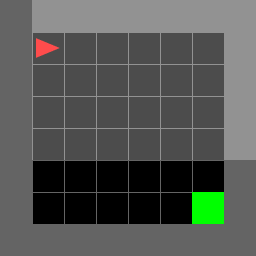

In [5]:
frames = []  # Stores frames for animation

done = False
total_reward = 0  # Tracks total accumulated reward
import time
while not done:
    # TODO: Select an action randomly
    # TODO: Take a step in the environment
    # TODO: Update the total reward
    action = np.random.randint(0,env.action_space.n)
    obs, reward, done, truncated, _=env.step(action)
    total_reward += reward
    frame = env.get_frame()
    frames.append(frame)


print("Total Reward:", total_reward)

# Do not modify the follwing code—any changes will result in a score of **0** for this cell.
gif_path = "/content/minigrid.gif"
imageio.mimsave(gif_path, frames, fps=5)

from IPython.display import Image
Image(filename=gif_path)


Simply execute this cell to explore the available actions that an agent can take in the MiniGrid environment. Understanding these actions will help you better navigate and interact with the environment.

In [6]:
actions = {i: env.actions(i).name for i in range(env.action_space.n)}
print("Available Actions:", actions)

Available Actions: {0: 'left', 1: 'right', 2: 'forward', 3: 'pickup', 4: 'drop', 5: 'toggle', 6: 'done'}


## **Implementing a Rule-Based Agent in MiniGrid**
In this section, you will implement a **simple rule-based agent** to navigate the **MiniGrid environment**. This will help you gain a deeper understanding of **observations**, **actions**, and **rewards** before progressing to **reinforcement learning**.

🎯 How to Get 5 Points?  
 1️⃣ Successfully execute the following code.  
 2️⃣ The rule-based agent should move based on rule in the environment.  
 3️⃣ The animation of the agent’s movement should be generated.  
 4️⃣ The total accumulated reward should be displayed.  
 5️⃣ If everything works correctly, congratulations! You earned 5 points! 🎉  

Total Reward: 0.961328125


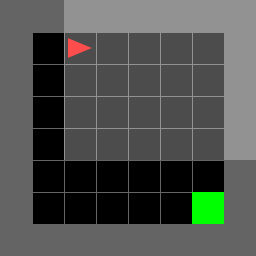

In [7]:
def rule_based_agent(obs):
    """
    ✅ Simple Rule-Based Agent:
    - **Reads the cell in front of the agent**
    - **Turns if a wall is ahead**
    - **Moves forward if the goal is ahead**
    """
    goal_id, wall_id, agent_id = 8, 2, 1
    # TODO: Retrieve the agent's current facing direction
    """# Map agent's direction to short string
        AGENT_DIR_TO_STR = {
            0: '>',
            1: 'V',
            2: '<',
            3: '^'
        }
    """
    # TODO: Find the agent's position within the observation grid
    obs_grid = obs['image'][:,:,0]
    #cur_pos=[3,6]
    # TODO: Extract the agent's coordinates

    # TODO: Calculate the coordinates of the cell directly in front of the agent based on its direction

    # TODO: Ensure `front_x, front_y` remains within valid grid boundaries
    # Treat any out-of-bounds position as a wall

    # TODO: Implement decision-making logic
    if obs_grid[3,5]==2:
        return np.random.randint(0,2)
    return 2

done = False
total_reward = 0
frames = []
obs, info = env.reset()
while not done:
    action = rule_based_agent(obs)  # 🔥 Execute the rule-based policy
    obs, reward, done, truncated, _ = env.step(action)
    total_reward += reward
    frame = env.get_frame()
    frames.append(frame)

# Do not modify the follwing code—any changes will result in a score of **0** for this cell.
print("Total Reward:", total_reward)

gif_path = "/content/minigrid.gif"
imageio.mimsave(gif_path, frames, fps=5)

Image(filename=gif_path)


# **Question 2: Reinforcement Learning with Tabular Methods**

In this section, we will explore **reinforcement learning (RL)** by implementing tabular-based **value learning** and **policy learning** in MiniGrid environments.

You will investigate two fundamental approaches in reinforcement learning:

## **📌 Value-Based Learning (Q-Learning)**
- Uses a **Q-table** to store action-value estimates for each state.
- The agent **updates Q-values** based on rewards received from the environment.
- Helps the agent **learn an optimal policy** by maximizing future rewards.

## **📌 Policy-Based Learning**
- Instead of learning a Q-table, it **learns a direct policy** (i.e., a mapping from states to actions).
- Can be implemented using **tabular-based policy iteration**.
- Helps understand how an agent can **directly optimize its behavior** without relying on Q-values.


## **Value-Based Learning (Q-Learning)**  

- Uses **Q-tables** to store action values for each state.  
- Applies the **Bellman equation** to update Q-values.  
- Implements **ε-greedy exploration** to balance exploration and exploitation.  


 🎯 How to Get 10 Points?  
 1️⃣ Successfully implement Q-learning to train an agent.  
 2️⃣ The agent should learn to navigate the environment using **Q-tables**.(7 points)

 3️⃣ The agent must reach the goal efficiently after training.  
 4️⃣ An animation showing the trained agent reaching the goal should be generated.  (3 points)

 5️⃣ If everything works correctly, congratulations! You earned 10 points! 🎉  


In [8]:
def tabular_q_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.1, gamma=0.99,
                       epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.999):
    """
    ✅ Implementing Tabular Q-Learning with Epsilon Decay
    - Uses a **Q-table** to store action values for each state.
    - Updates Q-values using the **Bellman equation**.
    - Implements **ε-greedy exploration** for action selection.
    """
    env = gym.make(env_name)
    # TODO: Initialize an empty Q-table to store state-action values.
    state_size = env.width*env.height*4
    action_size = env.action_space.n
    q_table = [[0 for j in range(action_size)] for i in range(state_size) ]
    rewards_per_episode = []
    # TODO: Initialize epsilon for the exploration-exploitation tradeoff.
    epsilon=epsilon_start
    def get_state(env):
        """✅ Extracts the state representation from the MiniGrid environment."""
        # TODO: Represent the state using the agent's position and direction.
        return env.agent_dir*env.width*env.height + env.agent_pos[1]*env.width + env.agent_pos[0]

    for episode in range(episodes):
        # TODO: Reset the environment at the beginning of each episode.
        env.reset()
        state = get_state(env)
        done = False
        total_reward = 0

        while not done:
            # TODO: Initialize the state in the Q-table if it is not already present.
            state = get_state(env)

            a_t=0
            # TODO: Implement an ε-greedy policy for action selection.
            random_num = np.random.random()
            if random_num <= epsilon:
                # random choose
                a_t = np.random.randint(0,action_size)
            else:
                # a_t should be the maximum index of state
                a_t=np.argmax(q_table[state])

            # TODO: Execute the action and observe the next state and reward.
            _pos=env.agent_pos
            obs,reward_t,done,truncate,_ = env.step(a_t)
            total_reward += reward_t
            # TODO: Initialize next_state in the Q-table if it is not already present.
            next_state = get_state(env)

            # TODO: Apply the Q-learning update rule (Bellman equation).
            a_mx = np.argmax(q_table[next_state])
            q_table[state][a_t] = q_table[state][a_t] + alpha*(reward_t+gamma*q_table[next_state][a_mx]-q_table[state][a_t])
            # TODO: Update the state to the next state.
            state = next_state
        rewards_per_episode.append(total_reward)

        # TODO: Decay epsilon over time to gradually reduce exploration.
        epsilon *= decay_rate

        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            print(f"Episode {episode + 1}/{episodes}, Avg Reward: {avg_reward:.4f}, Epsilon: {epsilon:.3f}")

    env.close()
    return q_table, rewards_per_episode

Train the agent in **MiniGrid-Empty-8x8**.  

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.


Episode 100/2000, Avg Reward: -0.2808, Epsilon: 0.905
Episode 200/2000, Avg Reward: 0.5733, Epsilon: 0.819
Episode 300/2000, Avg Reward: 0.7497, Epsilon: 0.741
Episode 400/2000, Avg Reward: 0.8296, Epsilon: 0.670
Episode 500/2000, Avg Reward: 0.8706, Epsilon: 0.606
Episode 600/2000, Avg Reward: 0.8854, Epsilon: 0.549
Episode 700/2000, Avg Reward: 0.9030, Epsilon: 0.496
Episode 800/2000, Avg Reward: 0.9127, Epsilon: 0.449
Episode 900/2000, Avg Reward: 0.9215, Epsilon: 0.406
Episode 1000/2000, Avg Reward: 0.9286, Epsilon: 0.368
Episode 1100/2000, Avg Reward: 0.9300, Epsilon: 0.333
Episode 1200/2000, Avg Reward: 0.9332, Epsilon: 0.301
Episode 1300/2000, Avg Reward: 0.9384, Epsilon: 0.272
Episode 1400/2000, Avg Reward: 0.9391, Epsilon: 0.246
Episode 1500/2000, Avg Reward: 0.9439, Epsilon: 0.223
Episode 1600/2000, Avg Reward: 0.9444, Epsilon: 0.202
Episode 1700/2000, Avg Reward: 0.9463, Epsilon: 0.183
Episode 1800/2000, Avg Reward: 0.9485, Epsilon: 0.165
Episode 1900/2000, Avg Reward: 0.949

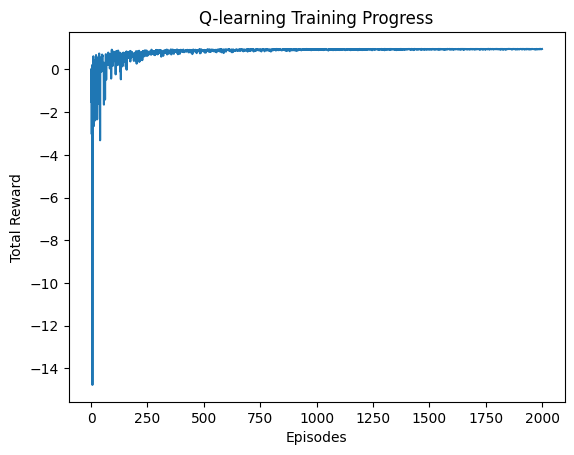

In [9]:
q_table, rewards = tabular_q_learning("MiniGrid-Empty-8x8-v0", episodes=2000)

plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Q-learning Training Progress")
plt.show()

After training the agent using **Q-learning**, we will now evaluate its performance in the environment.  

This function runs a **single test episode** using the learned **Q-table** and records the agent's movement as a **GIF**.


Total Reward: 0.9578125


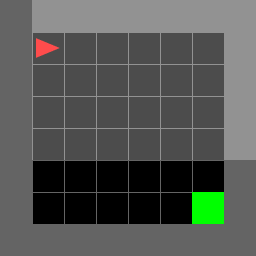

In [10]:
def run_learned_value(env_name, q_table, max_steps=100, gif_path="/content/minigrid_q_learning.gif"):
    """
    ✅ Runs a learned Q-table policy in a MiniGrid environment and saves an animation as a GIF.
    :param env_name: (str) Gym environment name.
    :param q_table: (dict) Trained Q-table.
    :param max_steps: (int) Maximum number of steps in the episode.
    :param gif_path: (str) Path to save the generated GIF.
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    # TODO: Retrieve the initial state (agent's position and direction).
    def get_state(env):
        """✅ Extracts the state representation from the MiniGrid environment."""
        # TODO: Represent the state using the agent's position and direction.
        return env.agent_dir*env.width*env.height + env.agent_pos[1]*env.width + env.agent_pos[0]
    frames = []
    total_reward = 0  # Tracks the total accumulated reward.
    state = get_state(env)
    for _ in range(max_steps):
        frames.append(env.get_frame())

        # TODO: Select an action based on the learned Q-table.
        # Execute the chosen action and observe the outcome.

        action = np.argmax(q_table[state])
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # Update the total reward.
        # TODO: Update the agent's state.
        state=get_state(env)
        if done:
            break
    frames.append(env.get_frame())
    env.close()

# Do not modify the follwing code—any changes will result in a score of **0** for this cell and also your training code above.
    # Save the recorded frames as a GIF.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    return Image(filename=gif_path)

# ✅ Run the trained agent using the learned value-based policy.
run_learned_value("MiniGrid-Empty-8x8-v0", q_table)

## **Policy-Based Learning**  
- Uses a **policy table** to store action probabilities for each state instead of Q-values.  
- Applies **policy gradient methods** to directly optimize the policy, rather than using the Bellman equation.  
- Uses **softmax action selection**, meaning actions are chosen probabilistically instead of always picking the one with the highest value.  

### **🔑 Key Differences from Value-Based Learning (Q-Learning)**  
| Feature            | Value-Based Learning (Q-Learning) | Policy-Based Learning (Policy Gradient) |
|--------------------|---------------------------------|----------------------------------------|
| **Learning Target** | Learns **Q-values** (action values) | Learns **action probabilities** (policy function) |
| **Action Selection** | Uses **ε-greedy** to choose the best Q-value | Uses **softmax** or a stochastic policy to sample actions |
| **Update Method** | Updates Q-values using the **Bellman equation** | Updates the policy directly using **policy gradients** |
| **Exploration Strategy** | Requires **ε-decay** to balance exploration | Exploration is **inherent** in the policy |
| **Best For** | **Discrete action spaces** (small state spaces) | **Continuous or large action spaces** |

## **📌 Summary**  
- **Q-Learning** learns **what the best action is** by estimating values for each action.  
- **Policy Learning** learns **how to act directly**, optimizing the probability of taking actions.  
- **Policy Learning is better for complex, continuous environments**, while **Value Learning is more efficient in simple, discrete environments**. 🚀


 🎯 How to Get 5 Points?  
 1️⃣ Successfully implement policy learning to train an agent.  
 2️⃣ The agent should learn to navigate the environment using **policy-tables**.  
 3️⃣ The agent must reach the goal efficiently after training. (4 points)
 4️⃣ An animation showing the trained agent reaching the goal should be generated. (1 points)  
 5️⃣ If everything works correctly, congratulations! You earned 5 points! 🎉  

In [11]:
print((tuple(env.agent_pos),env.agent_dir))

((6, 6), 1)


In [21]:

import math
from collections import defaultdict
def tabular_policy_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.1, gamma=0.99):
  # The default parameters should allow learning, but you can still adjust them to achieve better training performance.
    """
    ✅ Implementing Tabular Policy Learning using Softmax Policy
    - Uses a **policy table** to store action probabilities for each state.
    - Updates policy using a **policy gradient** (REINFORCE-like update).
    - Uses **softmax action selection** for exploration.
    """
    env = gym.make(env_name)
    # TODO: Initialize an empty policy table to store action probabilities.
    action_size = env.action_space.n
    policy_table = defaultdict(lambda : np.zeros(action_size))
    rewards_per_episode = []

    def get_state(env):
        """✅ Extracts the state representation from the MiniGrid environment."""
        agent_pos = tuple(env.agent_pos)
        direction = env.agent_dir
        return (agent_pos, direction)

    def softmax(x):
        """✅ Compute softmax values for an array."""
        exp_x = np.exp(x - np.max(x))  # Numeric stability
        return exp_x / exp_x.sum()

    for episode in range(episodes):
        obs, _ = env.reset()
        state = get_state(env)
        done = False
        total_reward = 0
        trajectory = []  # Store (state, action, reward) for policy update

        while not done:
            # TODO: Initialize the state in the policy table if it is not already present.
            if state not in policy_table.keys():
                policy_table[state]=np.zeros(action_size)

            # TODO: Select action using the softmax policy.

            action = np.random.choice(len(policy_table[state]),p=softmax(policy_table[state]))

            # TODO: Execute the action and observe the next state and reward.
            obs, reward, done, _,_ = env.step(action)
            total_reward += reward
            # Store transition for policy update
            trajectory.append((state, action, reward))

            # Update state
            next_state = get_state(env)
            state = next_state

        rewards_per_episode.append(total_reward)

        # ✅ **Policy Update (REINFORCE-like)**
        G = 0  # Return (discounted sum of rewards)
        for t in reversed(range(len(trajectory))):
            state, action, reward = trajectory[t]
            G = reward + gamma * G  # Discounted reward

            # TODO: Update policy table using policy gradient

            ### gradient of softmax(x) = [x==y]-softmax(x)
            prob = softmax(policy_table[state])
            grad=-prob
            grad[action]+=1
            policy_table[state] += alpha*G*grad
        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            print(f"Episode {episode + 1}/{episodes}, Avg Reward: {avg_reward:.4f}")

    env.close()
    return policy_table, rewards_per_episode


Train the agent in **MiniGrid-Empty-8x8** using **policy learning**.  

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [ ]:
# ✅ Train the agent using policy-based learning.
policy_table, rewards = tabular_policy_learning("MiniGrid-Empty-8x8-v0", episodes=2000)

plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Tabular Policy Learning Training Progress")
plt.show()

Now that you have trained your agent using **tabular policy learning**, let's visualize its performance in the **MiniGrid environment**.  

This function runs a **test episode** using the learned **policy table (π-table)** and records the agent's movement as a **GIF**.


In [ ]:
def run_learned_policy(env_name, policy_table, max_steps=100, gif_path="/content/minigrid_policy_learning.gif"):
    """
    ✅ Runs a learned policy in a MiniGrid environment and saves an animation GIF.
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    state = (tuple(env.agent_pos), env.agent_dir)

    frames = []
    total_reward = 0  # Track total accumulated reward

    for _ in range(max_steps):
        frames.append(env.get_frame())

        # TODO: Choose an action using the learned policy table
        action = np.argmax(policy_table[state])
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # Update total reward
        state = (tuple(env.agent_pos), env.agent_dir)

        if done:
            break

    env.close()

# Do not modify the follwing code—any changes will result in a score of **0** for this cell and also your training code above.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")


    return Image(filename=gif_path)

# ✅ Run the trained policy
run_learned_policy("MiniGrid-Empty-8x8-v0", policy_table)


In this section, you will train an agent using **Q-learning** in the **MiniGrid-DoorKey-8x8-v0** environment.  

However, you will likely find that the agent **fails to learn efficiently** in this more complex environment.  

You can comment out the training code to avoid retraining the agent every time you run this notebook.


In [ ]:
#q_table, rewards = tabular_q_learning("MiniGrid-DoorKey-8x8-v0", episodes=10000, epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.9995)

Now that we have trained an agent using **Q-learning** on **MiniGrid-DoorKey-8x8-v0**, let's evaluate its performance.

You can also comment out this cell.

In [ ]:
# ✅ Run the trained value once
#run_learned_value("MiniGrid-DoorKey-8x8-v0", q_table)


## **Reward Shaping**  

If the agent only receives a reward upon reaching the goal, how can it learn that **picking up the key** and **opening the door** are necessary steps?  

This is where **Reward Shaping** comes into play.  

### **📌 What is Reward Shaping?**  
Reward shaping is a technique used in **reinforcement learning (RL)** to provide additional rewards that help guide the agent toward desirable behaviors. Instead of giving a reward only when the agent completes the task, intermediate rewards are introduced to **reinforce progress** toward the goal.  

### **🛠 Why Use Reward Shaping?**  
- **Speeds up learning**: Helps the agent learn useful behaviors more quickly.  
- **Encourages exploration**: Provides incentives for discovering key steps in complex environments.  
- **Reduces sparse reward problems**: Addresses situations where rewards are given only at the end of an episode, making learning difficult.  

### **🎯 Example: Reward Shaping in MiniGrid-DoorKey**  
In **MiniGrid-DoorKey-8x8-v0**, the agent must:  
1. **Find and pick up the key**  
2. **Navigate to the locked door**  
3. **Unlock and pass through the door**  
4. **Reach the goal to receive the final reward**  

Without reward shaping, the agent may struggle to associate picking up the key with reaching the goal.

### **🚀 Key Takeaway**  
Reward shaping **bridges the gap between sparse rewards and effective learning**. It guides the agent by providing structured feedback, helping it navigate complex tasks more efficiently.

🎯 How to Get 15 Points?  
 1️⃣ Successfully implement reward-shaping to train an agent.  
 2️⃣ The agent should learn to navigate the environment using **Q-tables**.

 3️⃣ The agent must reach the goal efficiently after training.  
 4️⃣ An animation showing the trained agent reaching the goal should be generated.  (15 points)

 5️⃣ If everything works correctly, congratulations! You earned 10 points! 🎉  


In [ ]:
def tabular_q_learning_adjust(env_name="MiniGrid-DoorKey-5x5-v0", episodes=10000, alpha=0.1, gamma=0.99,
                              epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.9999, reward_shaping=True,
                              q_table=None, debug=False):
    """
    ✅ Implement Tabular Q-learning with Reward Shaping
    - Modify reward shaping to accelerate learning.
    - Adjust epsilon decay to ensure sufficient exploration.
    - Ensure the agent learns the full sequence: "pick up key → open door → reach goal".
    """
    env = gym.make(env_name)

    if q_table is None:
        q_table = {}

    rewards_per_episode = []
    epsilon = epsilon_start

    def get_state(env, prev_door_open):
        """✅ Extract the agent's state (position, direction, key possession, and door status)."""
        # TODO: Represent the state using agent position, direction, key possession, and door status.


    for episode in range(episodes):
        obs, _ = env.reset()
        state = get_state(env, False)  # Initially, the door is closed.
        done = False
        total_reward = 0
        prev_has_key = state[2]
        prev_door_open = state[3]
        episode_step = 0

        while not done:
            # TODO: Initialize the state in the Q-table if not already present.


            # TODO: Implement ε-greedy policy for action selection.


            # Execute the selected action.
            prev_carrying = env.carrying
            obs, reward, done, truncated, _ = env.step(action)
            next_state = get_state(env, prev_door_open)
            episode_step += 1

            # ✅ TODO: Implement reward shaping.




            # Update total reward.
            reward += shaped_reward
            total_reward += reward

            # TODO: Initialize the next state in the Q-table if not already present.


            # TODO: Apply Q-learning update rule (Bellman equation).


            # Move to the next state.
            state = next_state

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_end, epsilon * decay_rate)


        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            print(f"🚀 Episode {episode + 1}/{episodes}, Average Reward: {avg_reward:.2f}, Epsilon: {epsilon:.3f}")

    env.close()
    return q_table, rewards_per_episode




Training with reward shapping in the MiniGrid-DoorKey Environment.

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [ ]:
# ✅ Run the training.
print("🚀 Training MiniGrid-DoorKey-8x8-v0")
q_table, rewards = tabular_q_learning_adjust("MiniGrid-DoorKey-8x8-v0", episodes=4000)
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Reward Shaping Training Progress")
plt.show()

Now that you have trained your agent using reward shaping, let's visualize its performance in the **MiniGrid-DoorKey Environment**.  
⚠️ Do not modify this cell—any changes will result in a score of 0 for your training code above.

In [ ]:
run_learned_value("MiniGrid-DoorKey-8x8-v0", q_table)

# **Question 3: Implementing Tabular Learning with PyTorch**  

So far, we have implemented **Tabular Q-learning** using **NumPy** to store and update the Q-table.  
However, in real-world **reinforcement learning**, deep learning frameworks like **PyTorch** are often used to handle **large state spaces** and optimize learning.  

In this question, we will still use **tabular learning**, but instead of **NumPy**, we will implement **Q-learning** and **Policy Learning** using **PyTorch**.  


✅ **Q-Learning Implementation (10 Points)**  
- Correctly implements **Q-learning using PyTorch tensors** instead of NumPy.  
- Successfully **trains the agent** and **demonstrates an animation of reaching the goal**.  

✅ **Policy Learning Implementation (10 Points)**  
- Correctly implements **policy-based learning using PyTorch**, including a **softmax policy**.  
- Successfully **trains the agent** and **demonstrates an animation of reaching the goal**.  

🚀 **Full Score (20 Points)**: If both Q-learning and Policy Learning are implemented correctly and the agent **successfully reaches the goal**, you have **earned all 20 points! 🎉**  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def get_agent_state(env):
    """
    ✅ Extract the agent's state as (x, y) position and direction.
    """
    x, y = env.agent_pos  # Directly retrieve the agent's position.
    direction = env.agent_dir  # Retrieve the agent's current direction.
    return (x, y, direction)  # Return state as (x, y, direction).

class PyTorchQTable:
    def __init__(self, state_size, action_size, lr=0.1):
        """
        ✅ PyTorch Q-table Implementation.
        - Stores Q-values as a PyTorch tensor.
        - Uses gradient-based updates instead of direct assignment.
        - Optimizes learning using **Mean Squared Error (MSE)**.
        """
        self.state_size = state_size
        self.action_size = action_size

        # ✅ TODO: Initialize the Q-table as a PyTorch tensor.


        # ✅ TODO: Use **Stochastic Gradient Descent (SGD)** or **Adam** for optimization.


        # ✅ TODO: Use **Mean Squared Error (MSE) loss** for training.


    def update(self, state, action, target):
        """
        ✅ Update the Q-value using PyTorch optimization.
        """
        self.optimizer.zero_grad()

        # ✅ TODO: Retrieve the current Q-value.


        # ✅ TODO: Compute the **MSE loss**.


        # ✅ TODO: Perform **backpropagation**.


        # ✅ TODO: Perform **gradient descent**.


    def get_action(self, state, epsilon):
        """
        ✅ Implements **ε-greedy action selection**.
        """
        if np.random.rand() < epsilon:
            return np.random.choice(self.action_size)  # Explore.
        else:
            return torch.argmax(self.q_table[state]).item()  # Exploit.



def train_pytorch_q_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.1, gamma=0.99,
                             epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.9995):
    """
    ✅ Train a Q-learning agent using **PyTorch tensors**.
    """
    env = gym.make(env_name)
    state_size = (env.width, env.height, 4)  # (x, y, direction).
    action_size = env.action_space.n

    q_table = PyTorchQTable(state_size, action_size, lr=alpha)
    epsilon = epsilon_start

    for episode in range(episodes):
        obs, _ = env.reset()

        # Retrieve the agent's state directly from the environment.
        state = get_agent_state(env)

        done = False
        total_reward = 0

        while not done:
        #✅ TODO: Implement Q-learning using PyTorch Q-table.


        # Decay epsilon over time to reduce exploration.
        epsilon = max(epsilon_end, epsilon * decay_rate)

        # Print progress every 100 episodes.
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    env.close()
    return q_table


Train the agent in MiniGrid-Empty-8x8 with PyTorch Q-learning.

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [ ]:
print("🚀 Training PyTorch Q-learning on MiniGrid-Empty-8x8")
q_table = train_pytorch_q_learning("MiniGrid-Empty-8x8-v0", episodes=5000)

In [ ]:
def run_pytorch_q_learning(env_name="MiniGrid-Empty-8x8-v0", q_table=None, max_steps=100, gif_path="/content/minigrid_q_learning.gif"):
    """
    ✅ Runs a trained PyTorch Q-learning agent and visualizes its performance.
    - Executes a single test episode using the trained **Q-table**.
    - Saves the agent's movement as a **GIF**.

    :param env_name: (str) Name of the MiniGrid environment.
    :param q_table: (PyTorchQTable) Trained Q-table from PyTorch Q-learning.
    :param max_steps: (int) Maximum steps allowed in the episode.
    :param gif_path: (str) File path to save the GIF.
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    state = get_agent_state(env)  # ✅ Retrieve the agent's initial state.

    frames = []
    total_reward = 0

    for _ in range(max_steps):
        frames.append(env.get_frame())  # ✅ Capture the environment frame for visualization.

        # ✅ Select an action using the trained Q-table (exploitation).
        action = q_table.get_action(state, epsilon=0)  # Greedy action selection.

        # ✅ Execute the action in the environment.
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # ✅ Accumulate total reward.
        state = get_agent_state(env)  # ✅ Update the agent's state.

        if done:
            break  # ✅ Stop if the goal is reached.

    env.close()
# Do not modify the code below—any changes will result in a score of 0 for your training code above.
    # ✅ Save the frames as a GIF to visualize the agent's behavior.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    return Image(filename=gif_path)

run_pytorch_q_learning("MiniGrid-Empty-8x8-v0", q_table)


Instead of directly updating **Q-values**, we will now train an explicit **policy** using **Softmax Policy Gradients**.  

### **📌 What is Softmax Policy Gradient?**  
In **value-based reinforcement learning** (e.g., Q-learning), an agent **learns a Q-table** that estimates the value of each action in a given state. However, instead of storing and updating Q-values, **policy-based methods** directly learn a **policy** that maps states to actions.  

The **Softmax Policy Gradient** approach uses a **probabilistic policy representation**, where action selection is based on a **Softmax function** applied to policy scores. This enables the agent to explore actions **proportionally to their estimated effectiveness**, rather than always selecting the highest-value action.  

### **🛠 How Does It Work?**  
1. **The policy is represented by a probability distribution** over actions for each state.  
2. **The agent selects an action using Softmax probabilities**, rather than choosing greedily based on a Q-table.  
3. **The policy is updated using gradient ascent**, optimizing a loss function (e.g., Cross-Entropy Loss).  
4. **The agent improves its action selection strategy over time** by reinforcing actions that lead to higher rewards.  

### **🎯 Why Use Softmax Policy Gradients?**  
- ✅ **Handles large state spaces** more effectively than tabular Q-learning.  
- ✅ **Encourages exploration** by selecting actions probabilistically instead of always taking the best-known action.  
- ✅ **More suitable for stochastic environments**, where actions should not always be deterministic.  
- ✅ **Lays the foundation for deep policy-based RL**, such as REINFORCE and Actor-Critic methods.  

In this section, we will implement **policy learning** using **PyTorch** and train the agent using the **Softmax Policy Gradient method**.


In [ ]:
class PyTorchPolicy:
    def __init__(self, state_size, action_size, lr=0.1):
        """
        ✅ Implements a Softmax Policy using PyTorch.
        - Stores action probabilities as a PyTorch tensor.
        - Uses **Cross-Entropy Loss** for learning.
        """
        self.state_size = state_size
        self.action_size = action_size

        # ✅ TODO: Initialize the policy tensor.


        # ✅ TODO: Use **Adam optimizer** for policy optimization.


        # ✅ TODO: Use **Cross-Entropy Loss** for training.


    def get_action(self, state):
        """
        ✅ Sample an action based on **Softmax probabilities**.
        """
        # ✅ TODO: Compute softmax probabilities over available actions.


        # ✅ TODO: Sample an action based on the computed probabilities.

        return action

    def update(self, state, action, reward):
        """
        ✅ Update the policy using **Cross-Entropy Loss**.
        """
        self.optimizer.zero_grad()

        # ✅ TODO: Convert action to a tensor for loss calculation.


        # ✅ TODO: Compute **Cross-Entropy Loss**.


        # ✅ TODO: Perform **backpropagation**.


        # ✅ TODO: Perform **gradient descent optimization**.




def train_pytorch_policy_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.1, gamma=0.99):
    """
    ✅ Train Policy Learning using **Softmax Policy Gradient**.
    - Stores policy probabilities using **PyTorch tensors**.
    - Updates policy using **Cross-Entropy Loss**.
    - Optimizes policy using **Adam**.
    """
    env = gym.make(env_name)
    state_size = (env.width, env.height, 4)  # (x, y, direction).
    action_size = env.action_space.n

    policy_model = PyTorchPolicy(state_size, action_size, lr=alpha)

    for episode in range(episodes):
        obs, _ = env.reset()

        # Retrieve the agent's state directly from the environment.
        state = get_agent_state(env)

        done = False
        total_reward = 0
        # ✅ TODO: Implement Policy Learning.
        while not done:

        # Print progress every 1000 episodes.
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

    env.close()
    return policy_model


Train the agent in MiniGrid-Empty-8x8 with PyTorch policy learning.

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [ ]:
print("🚀 Training PyTorch Policy Learning on MiniGrid-Empty-8x8")
policy_model = train_pytorch_policy_learning("MiniGrid-Empty-8x8-v0", episodes=5000)

Now that you have trained your agent using **PyTorch policy learning**, let's visualize its performance in the **MiniGrid environment**.  

This function runs a **test episode** using the learned **policy table (π-table)** and records the agent's movement as a **GIF**.

⚠️ Do not modify this cell—any changes will result in a score of 0 for your training code above.


In [ ]:
def run_pytorch_policy_learning(env_name, policy_model, max_steps=100, gif_path="/content/minigrid_policy_learning.gif"):
    """
    ✅ Run a trained PyTorch Policy agent and save a GIF
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    state = (obs['agent_pos'][0], obs['agent_pos'][1], obs['direction'])

    frames = []
    total_reward = 0

    for _ in range(max_steps):
        frames.append(env.get_frame())

        action = policy_model.get_action(state)  # Select action using learned policy
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        state = (obs['agent_pos'][0], obs['agent_pos'][1], obs['direction'])

        if done:
            break

    env.close()

    # Save GIF
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    # Display GIF
    return Image(filename=gif_path)

# ✅ Run the trained policy agent
print("🚀 Running PyTorch Policy Learning agent")
run_pytorch_policy_learning("MiniGrid-Empty-8x8-v0", policy_model)
